In [105]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

In [106]:
import homework1

In [107]:
def testQ1():
    test_notes = ['A3', 'A2', 'C#4']
    for note in test_notes:
        print(homework1.note_name_to_frequency(note))

In [108]:
testQ1()

220.0
110.0
277.1826309768721


In [109]:
def vis(audio1, audio2, ran):
    plt.figure(figsize=(10, 4))
    plt.plot(audio1[:ran], label="Original", color='blue', alpha=0.6)
    plt.plot(audio2[:ran], label="Modified", color='orange', alpha=0.8)
    plt.legend()
    plt.show()

In [110]:
def testQ2():
    duration = 0.5 # in seconds
    sample_rate = 44100
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    audio = np.sin(2 * np.pi * 880 * t) # A5 tone

    faded_audio = homework1.decrease_amplitude(audio)
    
    vis(audio, faded_audio, 5000)

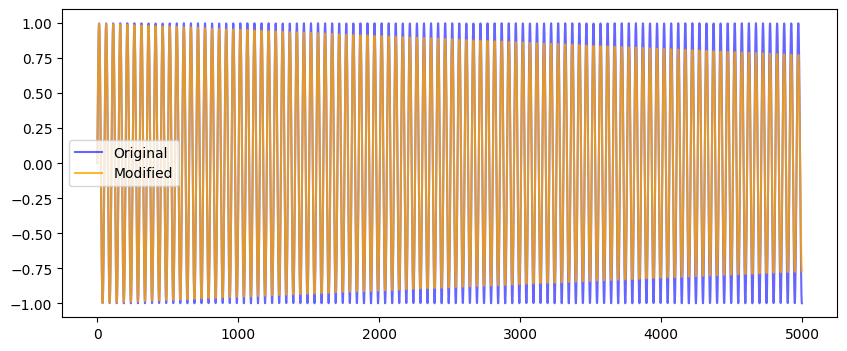

In [111]:
testQ2()

In [112]:
def testQ3():
    duration = 1.0  # in seconds
    sample_rate = 44100
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    audio = np.sin(2 * np.pi * 880 * t)  # A5 tone

    delayed_audio = homework1.add_delay_effects(audio)
    
    vis(audio, delayed_audio, 5000)

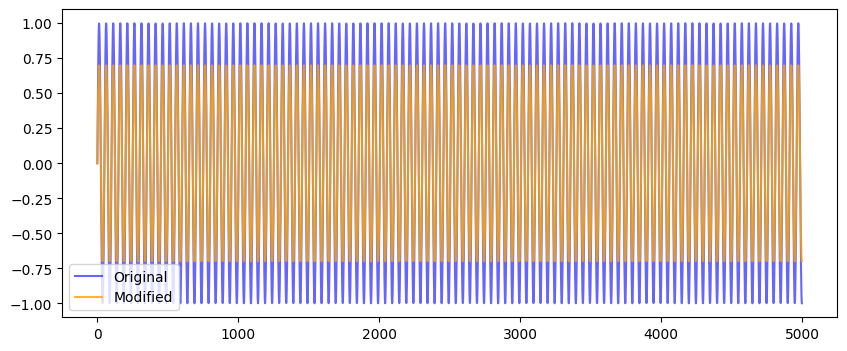

In [113]:
testQ3()

In [114]:
def testQ4a():
    duration = 0.5 # in seconds
    sample_rate = 44100
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    audio1 = np.sin(2 * np.pi * 220 * t) # A3 tone
    audio2 = np.sin(2 * np.pi * 880 * t) # A5 tone

    concat_audio = homework1.concatenate_audio([audio1, audio2])
    
    # Visualize here...

In [115]:
testQ4a()

In [116]:
def testQ4b():
    duration = 0.8  # in seconds
    sample_rate = 44100
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    audio1 = np.sin(2 * np.pi * 220 * t) # A3 tone
    audio2 = np.sin(2 * np.pi * 440 * t) # A4 tone

    mix_audio = homework1.mix_audio([audio1, audio2], [0.2, 0.8])
    
    # Visualize here...

In [117]:
testQ4b()

In [118]:
def testQ5():
    yours = homework1.create_sawtooth_wave(440, 2.0, 22050)
    
    plt.figure(figsize=(10, 4))
    plt.plot(yours[:5000], label="sawtooth", color='blue', alpha=0.6)
    plt.show()

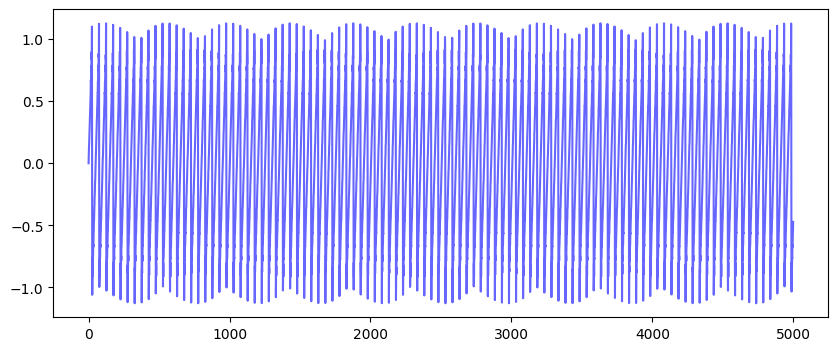

In [119]:
testQ5()

In [120]:
def testQ6():
    piano_files, drum_files = homework1.get_file_lists()
    
    yours = list(homework1.get_stats(piano_files[:2], drum_files[:2]).values())
    
    print(yours) # Should be a list of length 4

In [121]:
testQ6()

[2, 2, 256.3090909090909, 238.84545454545454]


In [122]:
def testQ7():
    piano_files, drum_files = homework1.get_file_lists()

    yours = []
    
    for file_path in piano_files[:2]:
        yours.append(homework1.get_lowest_pitch(file_path))
    
    for file_path in piano_files[:2]:
        yours.append(homework1.get_highest_pitch(file_path))
        
    for file_path in piano_files[:2]:
        yours.append(homework1.get_unique_pitch_num(file_path))
    
    print(yours)

In [123]:
testQ7()

[28, 34, 86, 82, 33, 33]


In [124]:
def testQ8():
    piano_files, drum_files = homework1.get_file_lists()

    yours = []

    for file_path in piano_files[:5]:
        yours.append(homework1.get_average_pitch_value(file_path))
    
    print(yours)

In [125]:
testQ8()

[57.526402640264024, 53.71217105263158, 63.33255324128247, 55.295896328293736, 45.99354838709677]


In [126]:
def train(feat): # Feat specifies which feature function will be used (i.e., featureQ9 or featureQ10)
    piano_paths, drum_paths = homework1.get_file_lists()
    piano_paths, drum_paths = piano_paths[:100], drum_paths[:100]
    
    X = []
    y = []
    
    for p in piano_paths:
        X.append(feat(p))
        y.append(1)
    for p in drum_paths:
        X.append(feat(p))
        y.append(0)
    
    # Split into train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)
    
    return sum(y_pred == y_test) / len(y_test) # Accuracy

In [127]:
def testQ9():
    yours = train(homework1.featureQ9)
    print("Accuracy = " + str(yours))

In [128]:
testQ9()

Accuracy = 0.975


In [129]:
def testQ10():
    yours9 = train(homework1.featureQ9)
    yours10 = train(homework1.featureQ10)
    print("Q9 accuracy = " + str(yours9) + ", Q10 accuracy = " + str(yours10))

In [130]:
testQ10()

Q9 accuracy = 0.975, Q10 accuracy = 0.95
